# Math 725

### Brent A. Thorne <brentathorne@gmail.com>

In class exercise detail.

## Ex 1.2 Midpoint Polygon Map

Suppose $V=(p_1,...,p_n)$, where $n$ is fixed.

$T:V\rightarrow V$

$(p_1,...,p_n) \xrightarrow{T} (\frac{p_1+p_2}{2},...,\frac{p_n+p_1}{2})$

In [1]:
# import libraries
import numpy as np
import sympy as sym
from sympy.matrices import Matrix
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex

# fancy plot
def z_plot(Z, c=None):
    z= np.array(Z.tolist()).astype(np.complex64)
    n = len(z)
    plt.scatter(z.real, z.imag, c=c)
    for i in range(len(z)): # this got a bit fancy
        zz = z[i] + .06 *np.exp(1j*2*np.pi*i/n)  #offset text
        plt.text(zz.real, zz.imag, i, fontsize=12)
    z = np.append(z,z[0]) # close the shape
    plt.plot(z.real, z.imag, c=c)
    plt.grid(visible=True);
    plt.gca().set_aspect("equal") # square grids are pretty
    plt.axhline(0, color='black', alpha = .2, linestyle='--')
    plt.axvline(0, color='black', alpha = .2, linestyle='--')  

#### Note: Machine Epsilon

Half the distance between 1 and the next larger number. This can vary by computer. IEEE standards for double precision specify
$\epsilon_{machine}=2^{−53}≈1.11×10^{−16}$

We'll avoid any rounding issues by using symbolic algebra to do our calculations then approximate the numbers for plotting.

### Show Plot using Cartesian Coordinates
FIXME!!! Extend example to any fraction of a side.

Matrix([
[1/2,   0,   0,   0, 1/2],
[1/2, 1/2,   0,   0,   0],
[  0, 1/2, 1/2,   0,   0],
[  0,   0, 1/2, 1/2,   0],
[  0,   0,   0, 1/2, 1/2]])

Matrix([
[             1],
[ exp(2*I*pi/5)],
[ exp(4*I*pi/5)],
[exp(-4*I*pi/5)],
[exp(-2*I*pi/5)]])

Matrix([
[0.202 - 0.622*I],
[0.655 + 0.e-9*I],
[0.202 + 0.622*I],
[-0.53 + 0.385*I],
[-0.53 - 0.385*I]])

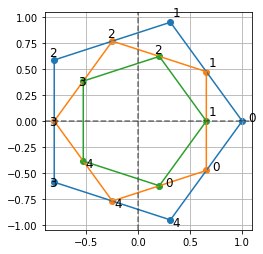

In [2]:
n=5
zeta = sym.exp(2*sym.I*sym.pi/n)
poly = Matrix([zeta**i for i in range(n)])

# use splitting matrix as given in lecture
# first we cook up a list with the first and last entries as defined
# then we build a Matrix rotating our list 'i' steps
m = [sym.Rational(1,2)]  + [0 for i in range(n-2)] + [sym.Rational(1,2)] 
M = Matrix([m[-i:] + m[:-i] for i in range(5)]) # this type of loop is called comprehension

for i in range(3):
    Z=M**i*poly
    z_plot(Z)
    
display(M)
display(poly)

display((Z).n(3)) # show rounded result of all the transformations
Z0 = Z # save for comparison below

### Show Plot using Euler Coordinates
FIXME!!! Extend example to any fraction of a side.

Matrix([
[1/2 + exp(-2*I*pi/5)/2,                      0,                      0,                      0,                      0],
[                     0, 1/2 + exp(-2*I*pi/5)/2,                      0,                      0,                      0],
[                     0,                      0, 1/2 + exp(-2*I*pi/5)/2,                      0,                      0],
[                     0,                      0,                      0, 1/2 + exp(-2*I*pi/5)/2,                      0],
[                     0,                      0,                      0,                      0, 1/2 + exp(-2*I*pi/5)/2]])

Matrix([
[  0.202 - 0.622*I],
[0.655 + 1.49e-8*I],
[  0.202 + 0.622*I],
[  -0.53 + 0.385*I],
[  -0.53 - 0.385*I]])

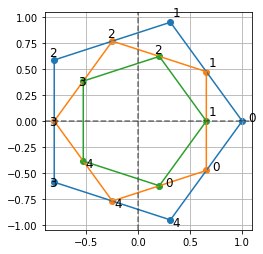

In [3]:
#zeta = sym.exp(2*sym.I*sym.pi/n)
#poly = Matrix([zeta**i for i in range(n)])
eta = sym.exp(-2*sym.I*sym.pi/n)  # fix up the direction
lambda_ = (1+eta)/2  # note direction fix up above

M = Matrix.diag([lambda_ for i in range(n)]) # Euler

for i in range(3):
    Z=M**i*poly
    z_plot(Z)
    
display(M)
display((Z).n(3)) # show rounded result, note equiv result as above.  Pretty neat.

In [4]:
# show the results are the same to machine epsilon
z0= np.array(Z0.tolist()).astype(np.complex64)
z= np.array(Z.tolist()).astype(np.complex64)
np.allclose(z0, z)

True